In [411]:
df<-read.csv("/kaggle/input/df-filtered/salaries_filtered - Sheet4.csv")
head(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2025,Intermediate,FT,Data Scientist,23000,USD,US,On site,US,M
2,2025,Intermediate,FT,Data Scientist,25000,USD,US,Fully Remote,US,M
3,2025,Intermediate,FT,Data Scientist,25000,USD,US,Fully Remote,US,M
4,2025,Intermediate,FT,Data Scientist,25000,USD,US,On site,US,M
5,2025,Senior-level,FT,Data Scientist,28000,USD,US,On site,US,M
6,2025,Intermediate,FT,Data Scientist,28000,USD,US,Fully Remote,US,M


In [412]:
nrow(df)

[1] 5842

> Pick random samples from our filtered data for atleast 50 selections

In [413]:
df_sample <- df[sample(nrow(df), 30, replace = FALSE), ]


In [414]:
nrow(df_sample)

[1] 30

> Dropping unncessary columns

In [415]:
colnames(df_sample)

[1] "work_year"          "experience_level"   "employment_type"   
 [4] "job_title"          "salary"             "salary_currency"   
 [7] "employee_residence" "remote_ratio"       "company_location"  
[10] "company_size"

In [416]:
df_final <- subset(df_sample, select = -c(employment_type, salary_currency,company_location,employee_residence,job_title))

In [417]:
df_final

,work_year,experience_level,salary,remote_ratio,company_size
,<int>,<chr>,<int>,<chr>,<chr>
4929,2025,Senior-level,220000,On site,M
3846,2025,Senior-level,175000,On site,M
3272,2025,Senior-level,160000,Fully Remote,M
5672,2025,Senior-level,288000,On site,M
1702,2025,Intermediate,120900,On site,M
2184,2025,Senior-level,135000,On site,M
3984,2025,Senior-level,180000,Fully Remote,M
3652,2025,Senior-level,170000,Fully Remote,M
48,2025,Junior,60000,On site,M


# Bootstrap 

In [418]:
set.seed(123) 
sample.size <- nrow(df_final) # sample size
n.samples <-1000 #Number of Replicates

bootstrap.results <- c() # empty vector to hold the results

for (i in 1:n.samples)
{
    obs <- sample(1:sample.size, replace=TRUE)
    bootstrap.results[i] <- mean(df_final$salary[obs]) # Mean of the bootstrap sample
}

In [419]:
bootstrap_variance <- var(bootstrap.results)
cat("Bootstrap estimate of variance of mean salary:", bootstrap_variance, "\n")

Bootstrap estimate of variance of mean salary: 129861516 


In [420]:
theta_hat <- mean(df_final$salary)
theta_star_bar <- mean(bootstrap.results)

bootstrap_bias <- theta_star_bar - theta_hat

cat("θ̂ (original estimate):", theta_hat, "\n")
cat("θ̂* (mean of bootstrap estimates):", theta_star_bar, "\n")
cat("Bootstrap Bias (θ̂* - θ̂):", bootstrap_bias, "\n")

θ̂ (original estimate): 175093.5 
θ̂* (mean of bootstrap estimates): 175470.6 
Bootstrap Bias (θ̂* - θ̂): 377.1037 


In [452]:
#stabdard error of Bootstrap Estimates
bootstrap_se<-sd(bootstrap.results)
bootstrap_se            

[1] 11395.68

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 141949  167442  174949  175471  182989  208827 

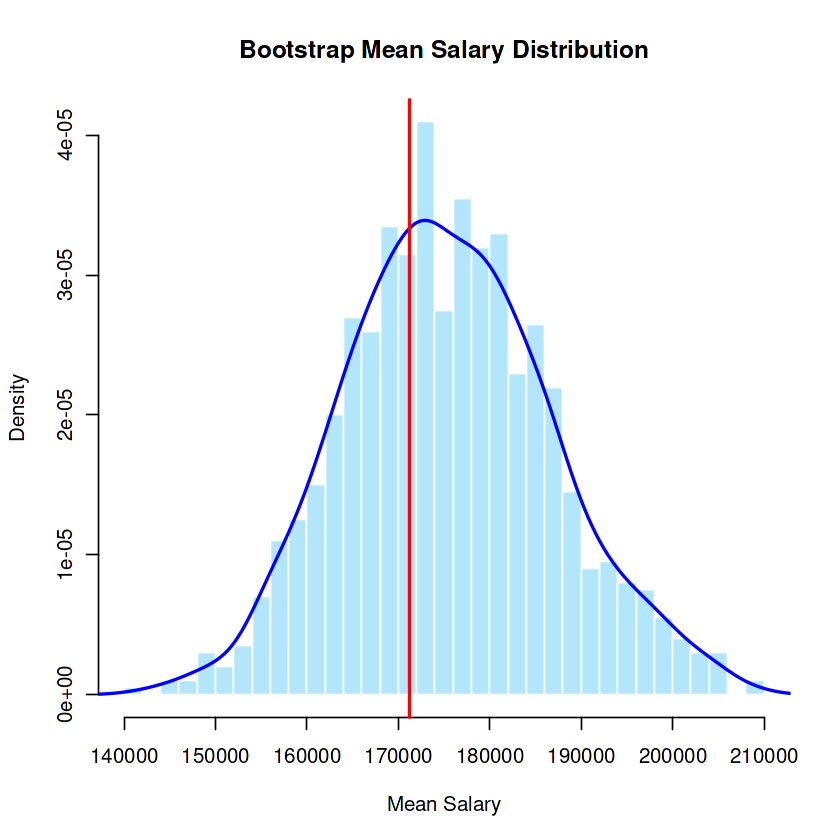

In [432]:
hist(bootstrap.results,
     breaks = 30,
     col = "#B3E5FC",
     border = "white",
     freq = FALSE,
     main = "Bootstrap Mean Salary Distribution",
     xlab = "Mean Salary")


lines(density(bootstrap.results), col = "blue", lwd = 2)
abline(v = bootstrap_mean, col = "red", lwd = 2)

summary(bootstrap.results)

# Jackknife

In [433]:
n <- nrow(df_final) #sample size
x<-df_final$salary # data
theta.hat<-mean(x) #mean of 

theta.jack <- numeric(n) #storage

for (i in 1:n){
theta.jack[i]<-mean(x[-i])
}

#Jackknife Mean variance
jackknife_var <- (n - 1) / n * sum((theta.jack - mean(theta.jack))^2)
cat("Jackknife variance estimate for mean salary:", jackknife_var)

Jackknife variance estimate for mean salary: 124315207

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 168738  174229  175442  175093  176282  179062 

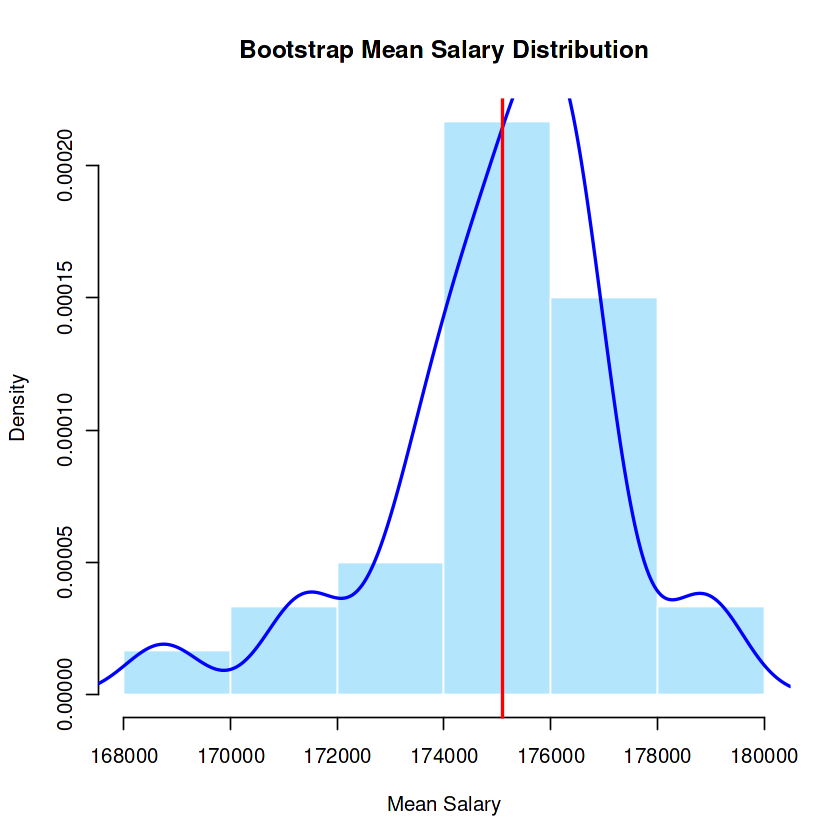

In [436]:
hist(theta.jack,
     col = "#B3E5FC",
     border = "white",
     freq = FALSE,
     main = "Bootstrap Mean Salary Distribution",
     xlab = "Mean Salary")


lines(density(theta.jack), col = "blue", lwd = 2)
abline(v = mean(theta.jack), col = "red", lwd = 2)

summary(theta.jack)

In [437]:
#Jackknife Bias
jackknife_bias<-(n-1)*(mean(theta.jack)-theta.hat)
cat("Jackknife Bias estimate for mean salary:", jackknife_bias)

Jackknife Bias estimate for mean salary: 0

In [453]:
jackknife_se<-sqrt((n-1)*mean((theta.jack - mean(theta.jack))^2))
jackknife_se

[1] 11149.67

In [471]:
n <- nrow(df_final)
x <- df_final$salary

theoretical_variance<-var(x)/n
theoretical_mean<-mean(x)

cat("Original Mean (θ̂):", theoretical_mean, "\n\n")
cat("Theoretical Variance:", theoretical_variance, "\n")

cat("Bootstrap Variance:", bootstrap_variance, "\n")
cat("Jackknife Variance:", jackknife_var, "\n\n")

cat("Theoretical SE:", theoretical_se, "\n")
cat("Bootstrap SE:", bootstrap_se, "\n")
cat("Jackknife SE:", jackknife_se, "\n")

Original Mean (θ̂): 175093.5 

Theoretical Variance: 124315207 
Bootstrap Variance: 129861516 
Jackknife Variance: 124315207 

Theoretical SE: 9731.329 
Bootstrap SE: 11395.68 
Jackknife SE: 11149.67 


In [462]:
library(ggplot2)

methods <- c("Theoretical", "Bootstrap", "Jackknife")

variance_values <- c(theoretical_variance, bootstrap_variance, jackknife_var)

se_values <- c(theoretical_se, bootstrap_se, jackknife_se)

variance_df <- data.frame(Method = methods, Variance = variance_values)
se_df <- data.frame(Method = methods, SE = se_values)



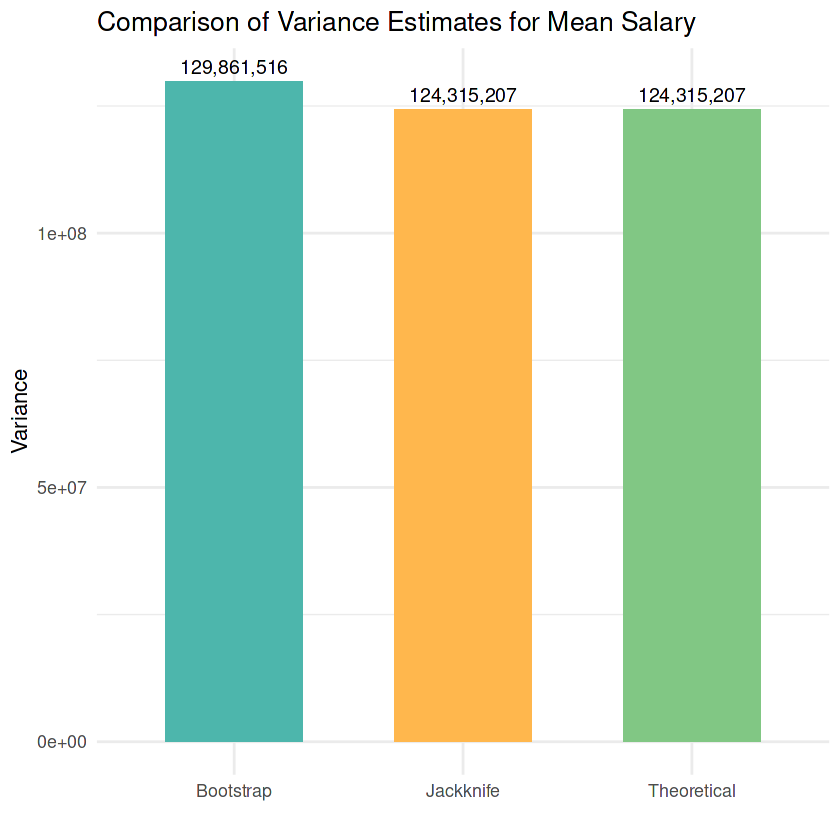

In [467]:
ggplot(variance_df, aes(x = Method, y = Variance, fill = Method)) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = format(round(Variance, 0), big.mark = ",")), 
            vjust = -0.5, size = 4) +
  labs(title = "Comparison of Variance Estimates for Mean Salary",
       y = "Variance", x = "") +
  theme_minimal(base_size = 13) +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("#4DB6AC", "#FFB74D", "#81C784"))


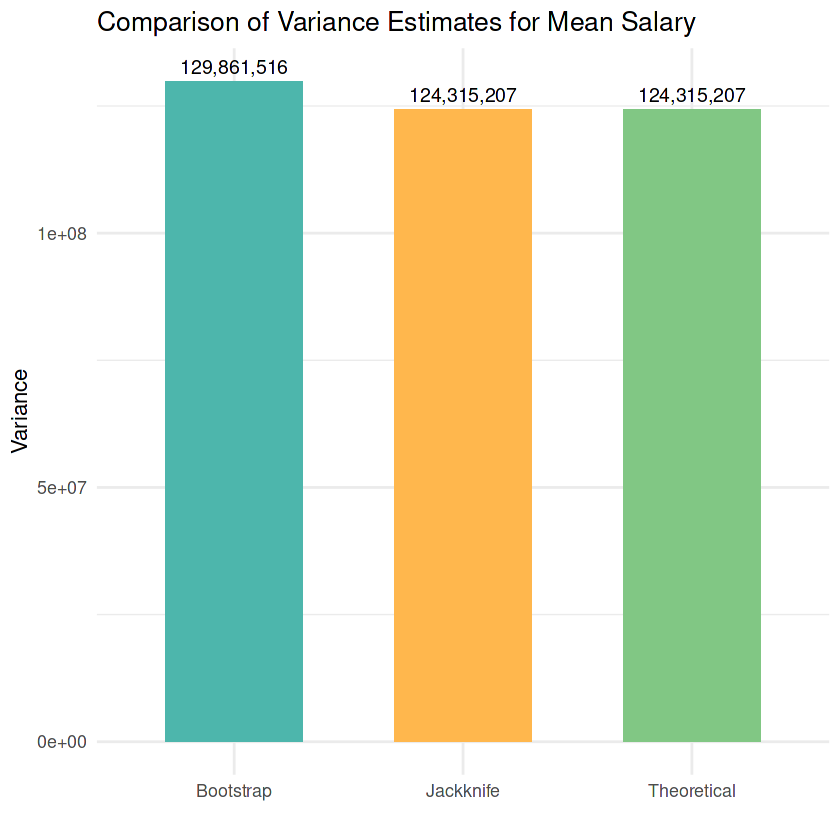

In [472]:
ggplot(variance_df, aes(x = Method, y = Variance, fill = Method)) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = format(round(Variance, 0), big.mark = ",")), 
            vjust = -0.5, size = 4) +
  labs(title = "Comparison of Variance Estimates for Mean Salary",
       y = "Variance", x = "") +
  theme_minimal(base_size = 13) +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("#4DB6AC", "#FFB74D", "#81C784"))


The original mean salary was $175,093.50 . To estimate the uncertainty of this average, we applied and compare the bias and varaince of methodss bootstrap, and jackknife.

Both the theoretical and jackknife variance estimates were the same ($124.3 million ),  with standard errors of about $9,731.33 USD and $11,149.67 USD, respectively.

The bootstrap method gave a slightly higher variance ($129.9 million USD²) and standard error ($11,395.68 USD), capturing more uncertain data possibly due to  outliers or skewed salary distributions from the original data.

In summary, all three methods agree closely, suggesting that the mean salary is a stable and reliable estimate, though the bootstrap indicates slightly more variability.